In [2]:
import pandas
df = pandas.read_csv('Data/salary.csv', index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [3]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'salary')

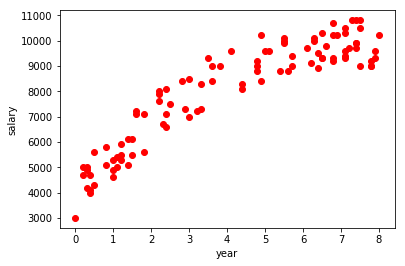

In [4]:
% pylab inline
plt.scatter(X,Y, color="red")
plt.xlabel('year')
plt.ylabel('salary')

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# y = ax+b
print('Coefficient:{}'.format(regr.coef_) )      #a
print('Intercept:{}'.format(regr.intercept_) )   #b

Coefficient:[712.59413615]
Intercept:5049.009899813836


In [7]:
regr.predict(X)

array([ 6759.23582656,  8968.27764861,  7400.57054909,  5191.52872704,
        6117.90110403, 10322.20650729, 10607.24416175,  9039.53706223,
        7044.27348102,  9467.09354391, 10322.20650729,  6759.23582656,
        6046.64169042,  9680.87178476,  8184.42409885,  7970.64585801,
        8540.72116693,  9609.61237114, 10108.42826645,  9538.35295753,
        7186.79230825,  5832.86344957, 10322.20650729,  5832.86344957,
        7543.08937632,  5191.52872704,  6616.71699933,  6687.97641295,
       10607.24416175,  6830.49524018,  5761.60403596,  5334.04755427,
        7756.86761717,  6189.16051765,  5262.78814066,  8611.98058054,
        5904.12286319,  5761.60403596,  5761.60403596,  9609.61237114,
        9538.35295753, 10108.42826645, 10393.4659209 ,  8469.46175331,
        5262.78814066,  5262.78814066,  5049.00989981,  9395.8341303 ,
        8968.27764861,  5619.08520873,  8469.46175331,  5334.04755427,
       10607.24416175,  7614.34878994, 10393.4659209 ,  5405.30696789,
      

Text(0,0.5,'salary')

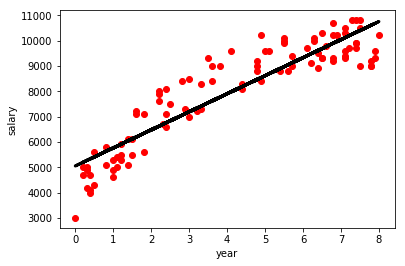

In [8]:
plt.scatter(X,Y, color="red")
plt.plot(X, regr.predict(X), linewidth = 3, color = "black")
plt.xlabel('year')
plt.ylabel('salary')

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

Text(0,0.5,'salary')

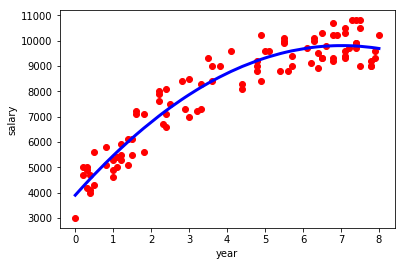

In [11]:
plt.scatter(X,Y, color="red")
plt.plot(X2, regr.predict(X2_), color= "blue", linewidth = 3)
plt.xlabel('year')
plt.ylabel('salary')

In [12]:
import pandas
df = pandas.read_csv('Data/house-prices.csv')

In [13]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [14]:
#pandas.get_dummies(df['Brick'])
#pandas.get_dummies(df['Neighborhood'])

In [15]:
house = pandas.concat([df, pandas.get_dummies(df['Brick']), pandas.get_dummies(df['Neighborhood'])], axis = 1)
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [16]:
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North']]
Y = house['Price'].values

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
regr.predict(X)

array([103182.88325028, 116127.48050967, 113047.47841973, 109230.99957752,
       125063.33919194, 108460.31885328, 148704.1829466 , 153525.7716034 ,
       120366.97977446, 103865.84286795, 129178.03614553, 124719.73204259,
        98814.52852196, 128446.1660185 , 167661.38200801, 141655.63841392,
       137272.82484975, 110937.30627969, 123978.2844232 , 161741.1079378 ,
        99162.18882362, 103583.96519486,  95423.39386208, 119609.92969489,
       159114.47019421, 139349.71073264, 136779.2847555 , 102660.24046903,
        86407.16329753, 180614.63904496, 175208.34797844, 129459.93561064,
       148719.93761665, 150535.84930595, 107604.65962152, 123974.23127089,
       109512.89904263, 158652.44607031, 134229.22007367, 106340.56922088,
        99261.81118229, 144451.05303714, 105514.14309396, 139883.70129304,
       162800.982754  , 100222.06363982, 123225.48902465,  89698.67559875,
       113251.69400417, 113250.68079769, 132887.59800223, 100185.53590812,
       115169.51091764, 1